In [110]:
import pandas as pd,numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [111]:
#to display the entire dataframe 
pd.set_option("display.max.columns", None)

In [112]:
loan=pd.read_csv("loan.csv",low_memory=False)
loan.shape

(39717, 111)

In [113]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [114]:
#function to find missing Value
def missing_data(loan):
    total = loan.isnull().sum()
    percent = round(100*(loan.isnull().sum()/len(loan.index)), 2)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data(loan)

,Total,Percent
id,0,0.00
member_id,0,0.00
loan_amnt,0,0.00
funded_amnt,0,0.00
funded_amnt_inv,0,0.00
term,0,0.00
int_rate,0,0.00
installment,0,0.00
grade,0,0.00
sub_grade,0,0.00


##### dropping columns have more than 32% missing values

In [115]:
max_number_of_nas = 12940
loan = loan.loc[:, (loan.isnull().sum() < max_number_of_nas)]
loan.shape

(39717, 53)

In [116]:
## can drop below columns as all values are 0 and null values
loan['collections_12_mths_ex_med'].value_counts()
loan['chargeoff_within_12_mths'].value_counts()
loan['recoveries'].value_counts()
loan['collection_recovery_fee'].value_counts()

print(loan['id'].duplicated().any())
print(loan['member_id'].duplicated().any())
print(loan['url'].duplicated().any())
print(loan['pymnt_plan'].duplicated().any(),loan['pymnt_plan'].unique())
print(loan['initial_list_status'].duplicated().any(),loan['initial_list_status'].unique())
print(loan['application_type'].duplicated().any(),loan['application_type'].unique())
print(loan['chargeoff_within_12_mths'].duplicated().any(),loan['chargeoff_within_12_mths'].unique())
print(loan['tax_liens'].duplicated().any(),loan['tax_liens'].unique())

False
False
False
True ['n']
True ['f']
True ['INDIVIDUAL']
True [ 0. nan]
True [ 0. nan]


In [117]:
# dropping columns that dont help with analysing default rate
loan=loan.drop(columns=['url','emp_title','title', 'zip_code','addr_state' ,'id', 'member_id'])
# dropping columns with nulls/zeros
loan=loan.drop(columns=['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med'])
#dropping 'pymnt_plan'---n, 'policy_code'---1, 'application_type'---individual ,'initial_list_status'----f as all values 
loan=loan.drop(columns=['pymnt_plan','policy_code','application_type','initial_list_status'])
loan.shape

(39717, 37)

In [118]:
missing_data(loan)

,Total,Percent
loan_amnt,0,0.00
funded_amnt,0,0.00
funded_amnt_inv,0,0.00
term,0,0.00
int_rate,0,0.00
installment,0,0.00
grade,0,0.00
sub_grade,0,0.00
emp_length,1075,2.71
home_ownership,0,0.00


In [119]:
## sanitising the data.
loan['int_rate'] = loan['int_rate'].astype(str).apply(lambda x:x.replace("%",'')).astype(float)
print(loan['int_rate'].dtype)


loan['revol_util']=loan['revol_util'].astype(str).apply(lambda x:x.replace("%",'')).astype(float)

loan['emp_length']=loan['emp_length'].astype(str).apply(lambda x:x.rstrip(' years'))
loan['emp_length']=loan['emp_length'].astype(str).apply(lambda x:0 if x=='< 1' else x.rstrip('+'))
loan['emp_length']=loan.emp_length.astype(float)



float64


In [120]:
loan=loan.loc[~(loan.revol_util.isnull() | loan.pub_rec_bankruptcies.isnull() | loan.last_credit_pull_d.isnull()|loan.last_pymnt_d.isnull())]
loan['emp_length'] = loan['emp_length'].fillna(np.ceil(loan.emp_length.median()))
loan.shape

(38902, 37)

In [121]:
# Annual income slabs
bins = [0, 50000, 100000, 200000, 233004]
slabs = ['< 50k', '50k - 1L', '1L - 2L', '2L+']
loan['annual_inc_slabs'] = pd.cut(loan['annual_inc'], bins, labels=slabs)

# Interest slabs
bins = [0, 6, 12, 18, 25]
slab = ['0-6', '7-12', '13-18', '19-25']
loan['int_rate_slabs'] = pd.cut(loan['int_rate'], bins, labels=slab)

# missing_data(loan)

In [122]:
#seggregating the data into numerical and catageorical data
numeric_cols=loan.dtypes[loan.dtypes != "object"].index
print("num , ",len(numeric_cols),"cols -",numeric_cols)

num ,  28 cols - Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies', 'annual_inc_slabs',
       'int_rate_slabs'],
      dtype='object')


let's check the correlation of numeric cols

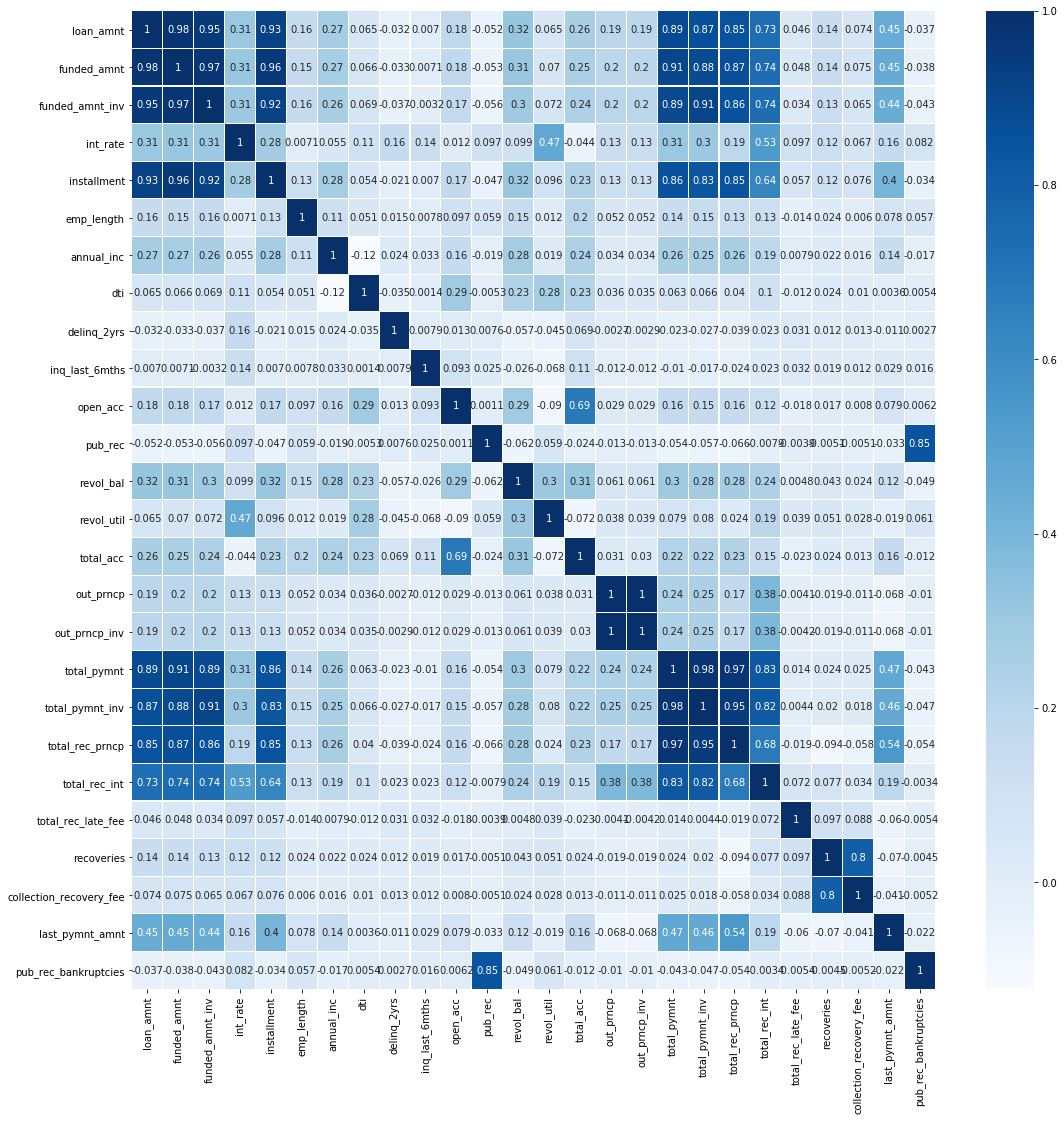

In [123]:
corr=loan[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(corr,cmap="Blues",
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,linewidths=.1)
plt.show()

####  from the heat map we can see few set of columns are highly correlated,
 -  set1: loan_amount, funded_amnt,funded_amnt_inv,installment 
 -  set2: 'total_pymnt',total_pymnt_inv', 'total_rec_prncp', 'total_rec_int'
 -  set3: 'recoveries', 'collection_recovery_fee'
 -  set4: pub_rec_bankruptcy,pub_rec
 -  set5: out_prncp and out_prncp_inv
  -  as the values of the each set shows similar behaviour,dropping off the remaining columns of set keeping one.


In [124]:
loan=loan.drop(columns=['funded_amnt','funded_amnt_inv','installment', 'collection_recovery_fee', 'pub_rec', 'out_prncp_inv'])
loan=loan.drop(columns=['total_pymnt_inv', 'total_rec_prncp', 'total_rec_int'])
loan.shape

(38902, 30)

In [125]:
#dataset of charged off people
loan=loan.loc[~(loan.loan_status=='Current')]
loan['default_status']=loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan_default=loan.loc[loan.loan_status=='Charged Off']

In [126]:
# 1.loan amount analysis
loan['loan_amnt'].describe()

count    37762.000000
mean     11080.126185
std       7362.459495
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

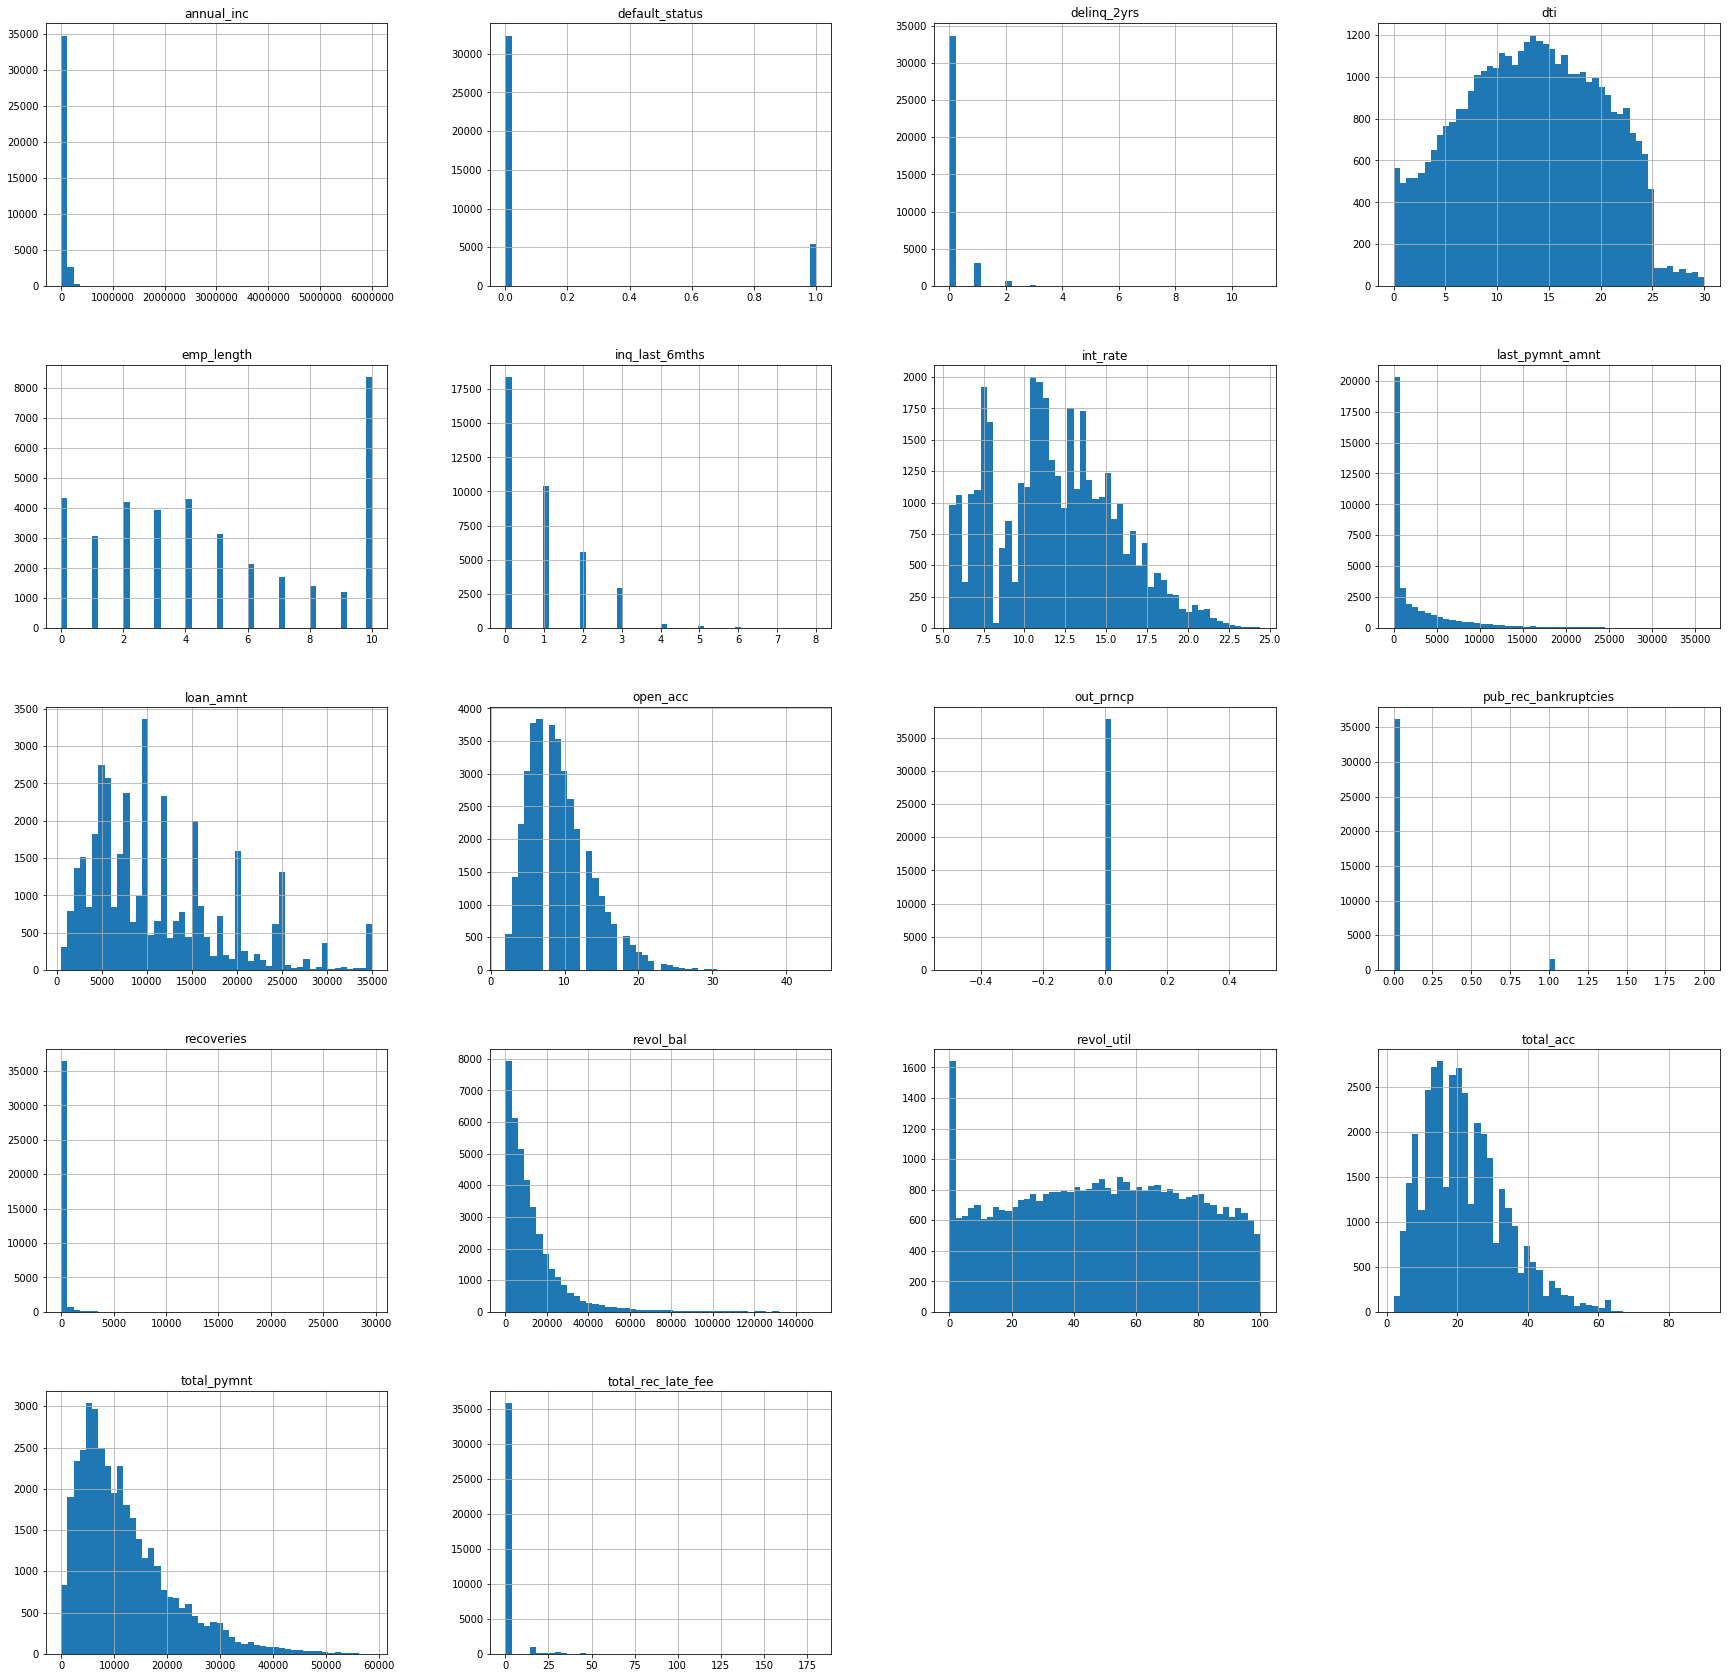

In [127]:
# hist for loan, univariate analysis
loan.hist(bins=50,figsize=(30,30))
plt.show()

##### inference from above plots
. annual income has ouliers, outlier treatment is required
. most of the borowwer's have delinq_2yrs as 0.
.peolpe with exp 10 or more than 10 years borrowed more loans
.very few borrowers have pub rec bankruptices as 1.

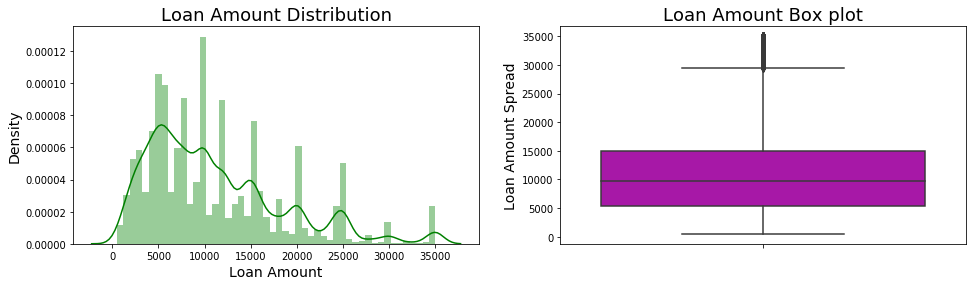

In [128]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(loan['loan_amnt'],color='g')
plt.title("Loan Amount Distribution", fontsize=18)
plt.xlabel("Loan Amount", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.subplot(1,2,2)
sns.boxplot(y=loan['loan_amnt'],color='M')
plt.title("Loan Amount Box plot", fontsize=18)
plt.ylabel("Loan Amount Spread", fontsize=14)
plt.show()

From the distribution plot it can be seen that value which is a mutiple of 5000 has sudden spikes and from the box plot it can be seen that 75% of the loan amount lies between 5000 and 15000 USD , and most representative loan amount is 10000 usd

let's check how Loan Amount effects defaulted.

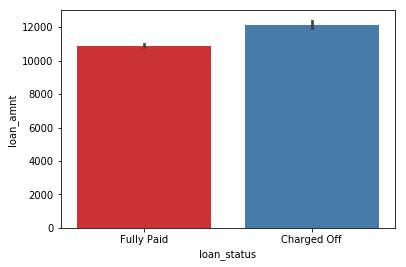

In [129]:
sns.barplot(x='loan_status',y='loan_amnt',data=loan,palette="Set1")
plt.show()

#####  loan amount of  charged off people is high

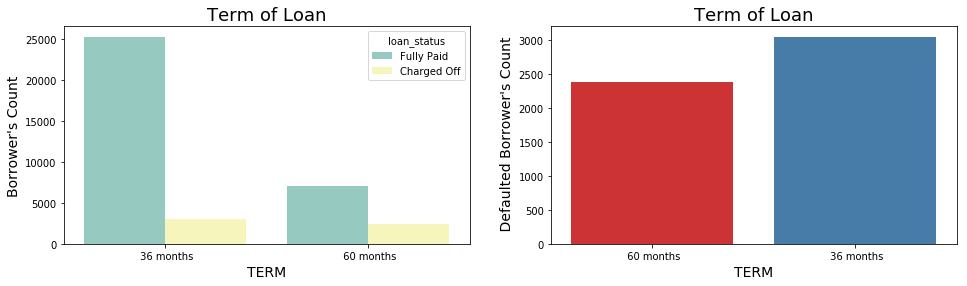

In [130]:
# 2.term analysis
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(loan.term, data=loan,hue='loan_status',palette="Set3")
plt.title('Term of Loan',fontsize=18)
plt.xlabel('TERM',fontsize=14)
plt.ylabel("Borrower's Count",fontsize=14)
plt.subplot(1,2,2)
sns.countplot(loan_default.term,data=loan_default, palette="Set1")
plt.title('Term of Loan',fontsize=18)
plt.xlabel('TERM',fontsize=14)
plt.ylabel(" Defaulted Borrower's Count",fontsize=14)
plt.show()

##### plot 1 Most of the borrowers prefer to take 36 months loan.
#####  plot 2 - borrowers who took 36 months loan defaulted more

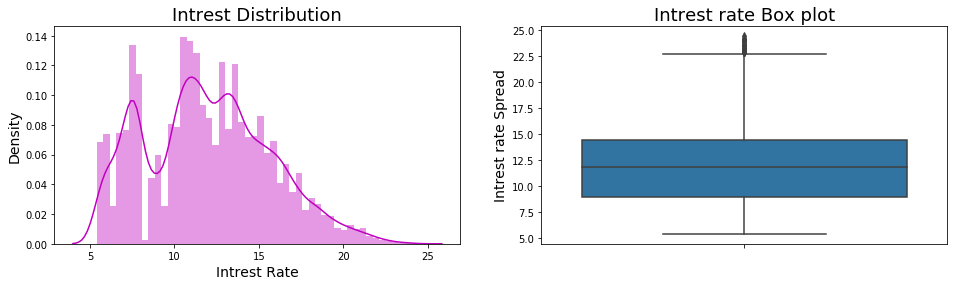

In [131]:

# 3.intrest rate analysis
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(loan['int_rate'],color='m')
plt.title("Intrest Distribution", fontsize=18)
plt.xlabel("Intrest Rate", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.subplot(1,2,2)
sns.boxplot(y=loan['int_rate'])
plt.title("Intrest rate Box plot", fontsize=18)
plt.ylabel("Intrest rate Spread", fontsize=14)
plt.show()

from above plots we can infer that 75% of intrest rates lies between 10% and 15% , avg intrest rate is 12.5 percent

#### lets check defaulted status vs intrest rate

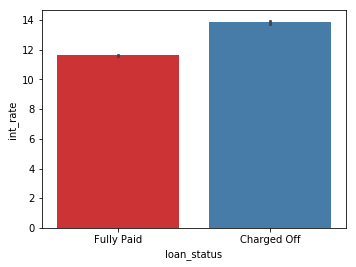

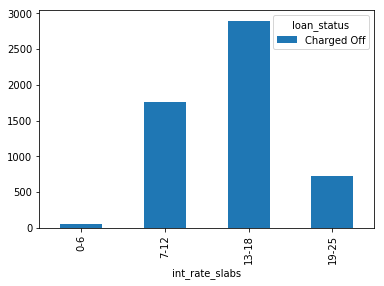

In [132]:


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='loan_status', y='int_rate',data=loan,palette="Set1")
plt.show()
int_rate_slab = loan_default.groupby(['int_rate_slabs','loan_status'])['int_rate_slabs'].agg({'Frequency':'count'}).Frequency.unstack().plot.bar()
plt.show()



#### Intresr rates are high for defaulted borrower's and most them fall in the intrest slab of 13-18 percent.

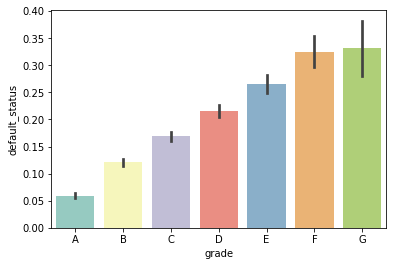

In [133]:
# grade with defaulted status
loan = loan.sort_values(['grade','sub_grade']).reset_index(drop=True)
sns.barplot(x='grade',y='default_status',data=loan,palette="Set3")
plt.show()

#####  Default rate increases from A to  G

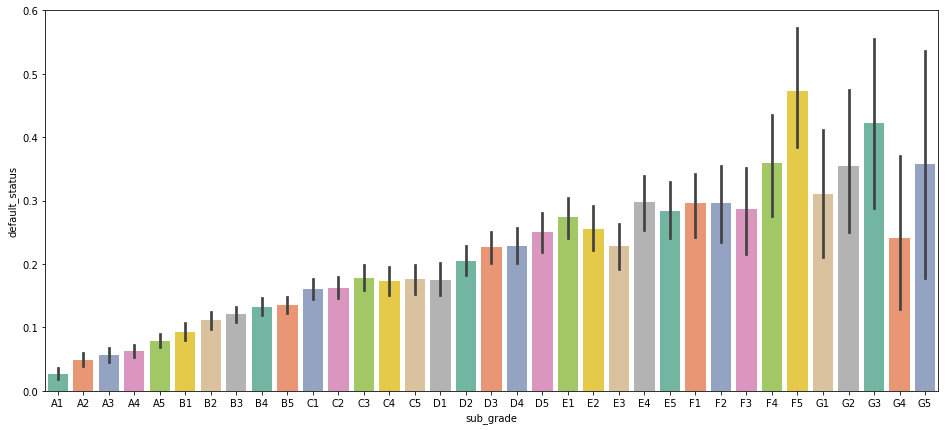

In [134]:
# subgrade with  defaulted status
plt.figure(figsize=(16,7))
sns.barplot(x='sub_grade', y='default_status',data=loan,palette="Set2")
plt.show()

similar to grade,risk of lending money within subgrades from A to D also increases, however for the grades E , F and G though the risk increases within subgrade risk is not orderly

In [135]:
## Annual income
loan['annual_inc'].describe()

count    3.776200e+04
mean     6.883396e+04
std      6.360965e+04
min      4.000000e+03
25%      4.028175e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

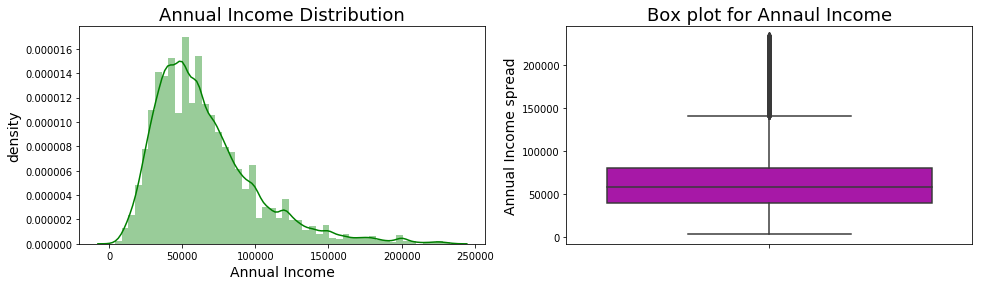

count     37382.000000
mean      65414.564041
std       35065.365224
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80494.500000
max      233004.000000
Name: annual_inc, dtype: float64


In [136]:
outliers_income=np.quantile(loan.annual_inc,.99)
loan=loan.loc[loan.annual_inc<outliers_income]
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(loan.annual_inc,color='g')
plt.title("Annual Income Distribution", fontsize=18)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.subplot(1,2,2)
sns.boxplot(y=loan.annual_inc,color='M')
plt.title("Box plot for Annaul Income", fontsize=18)
plt.ylabel("Annual Income spread", fontsize=14)
plt.show()
print(loan['annual_inc'].describe())

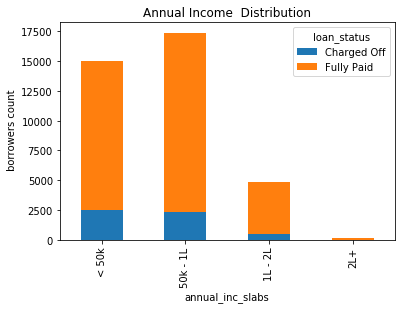

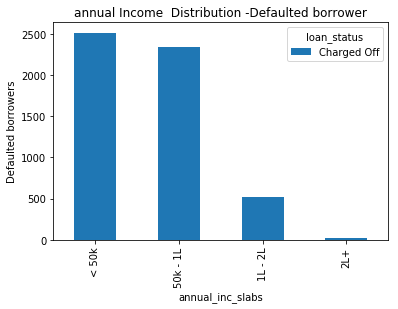

In [137]:
income_slabs= loan.groupby(['annual_inc_slabs','loan_status'])['annual_inc_slabs'].agg({'Frequency':'count'})
income_slabs.Frequency.unstack().plot.bar(stacked=True)
plt.title('Annual Income  Distribution')
plt.ylabel(' borrowers count')
income_slabs_default= loan_default.groupby(['annual_inc_slabs','loan_status'])['annual_inc_slabs'].agg({'Frequency':'count'})
income_slabs_default.Frequency.unstack().plot.bar(stacked=True)
plt.title('annual Income  Distribution -Defaulted borrower')
plt.ylabel('Defaulted borrowers')
plt.show()


##### plot 1: most of the borrowers fall in range of  0-1Lac slab 
##### plot 2 : borrowers in the income range of 0-1L tend to defaulted more are accepting thier loan application is risky

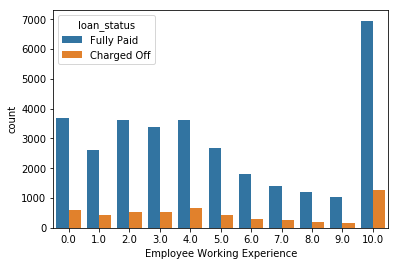

In [138]:
# Employee term
sns.countplot(x='emp_length', hue='loan_status', data=loan)
plt.xlabel('Employee Working Experience')
plt.show()

#### employee's with experience 10years or morethan 10 years default more

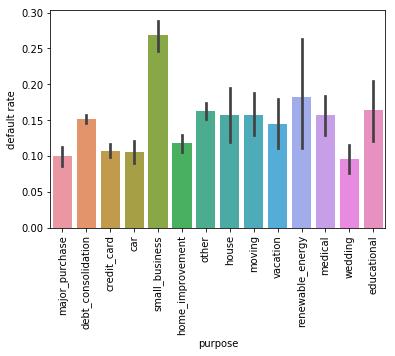

In [139]:
# analysis of purpose
sns.barplot(x='purpose',y='default_status', data=loan)
plt.ylabel("default rate")
plt.xticks(rotation=90)
plt.show()

#####  From the plot we can infer that default rate high is high for small_business, renewable energy and educational.However from univariant analysis it can be seen that most loans are taken for debt consolidation and the default rate for the same is not neligable.

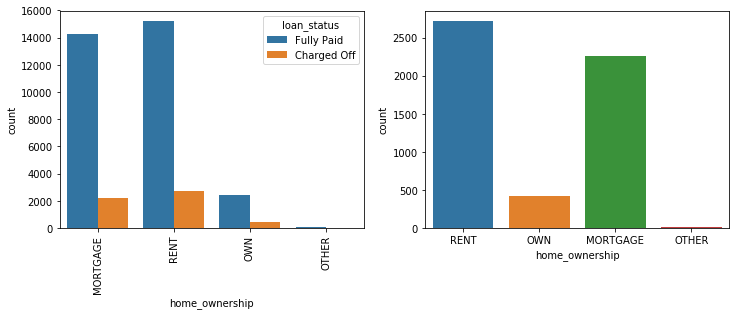

In [140]:
# univariate analysis home ownership
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='home_ownership',hue='loan_status' ,data=loan)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x='home_ownership' ,data=loan_default)
plt.show()

#### most of the borrower's home is Rented or Mortgaged and they are likely to default

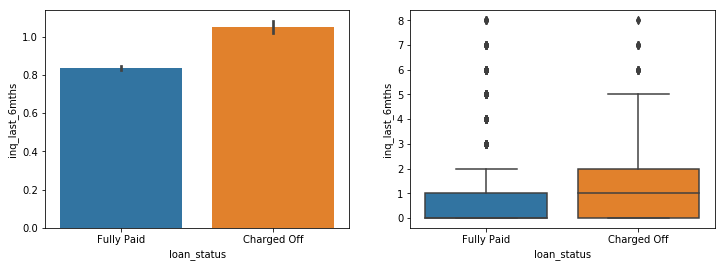

In [141]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='loan_status',y='inq_last_6mths',data=loan)
plt.subplot(1,2,2)
sns.boxplot(y='inq_last_6mths', x='loan_status', data=loan)
plt.show()

#### borrowers who enquired more has higher default rate

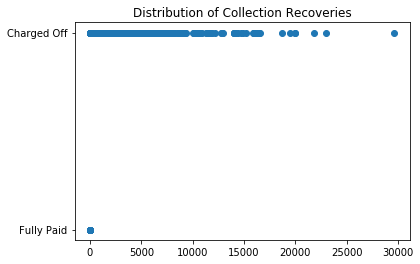

In [142]:

plt.scatter(loan.recoveries, loan.loan_status)
plt.title('Distribution of Collection Recoveries')
plt.show()

In [143]:
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)
loan.groupby('year').year.count()

year
2007        7
2008     1099
2009     4635
2010    11372
2011    20269
Name: year, dtype: int64

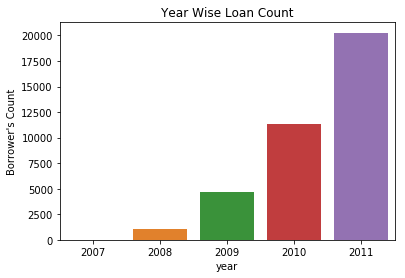

In [144]:
sns.countplot(loan.year)
plt.title("Year Wise Loan Count")
plt.xlabel("year")
plt.ylabel("Borrower's Count")
plt.show()

Leanding club's borrowers increased for with years

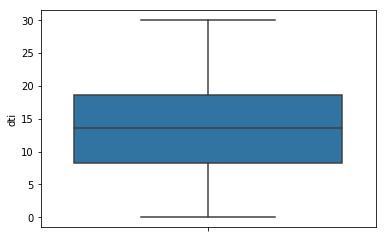

In [145]:

sns.boxplot(y=loan.dti)
plt.show()

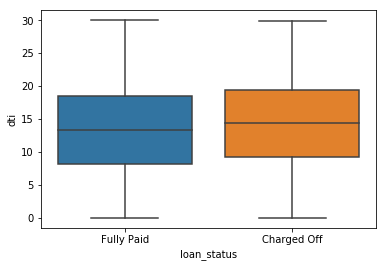

In [146]:
sns.boxplot(x='loan_status',y='dti', data=loan)
plt.show()

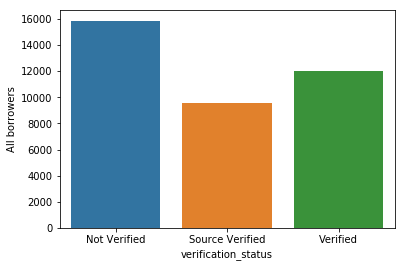

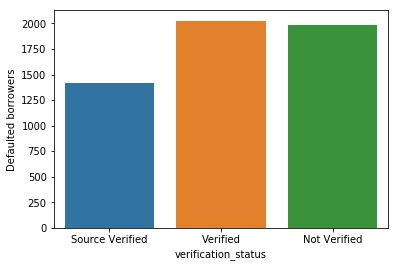

In [147]:
## verfification status
# loan['verified']
sns.countplot(x='verification_status',data=loan)
plt.ylabel('All borrowers')
plt.show()
sns.countplot(x='verification_status',data=loan_default)
plt.ylabel('Defaulted borrowers')
plt.show()

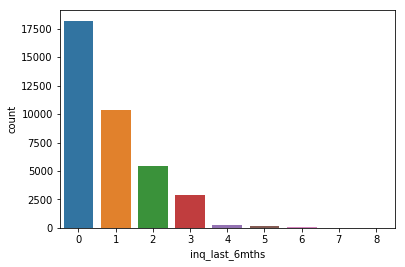

In [148]:
## univariate analysis of inq_last_6mnths
sns.countplot(loan.inq_last_6mths)

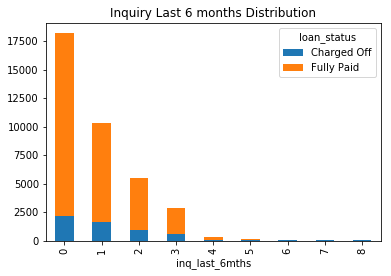

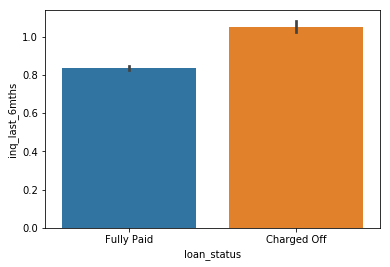

In [149]:
Inq_seg=loan.groupby(['inq_last_6mths','loan_status'])['inq_last_6mths'].agg({'Frequency':'count'})
Inq_seg.Frequency.unstack().plot.bar(stacked=True)
plt.title('Inquiry Last 6 months Distribution')
plt.show()
sns.barplot(y='inq_last_6mths', x='loan_status' ,data=loan)
plt.show()

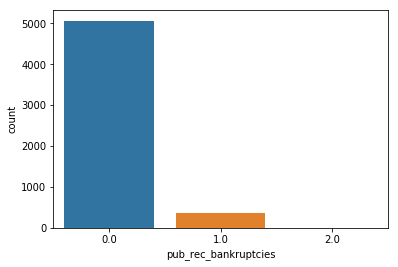

In [154]:
sns.countplot(x='pub_rec_bankruptcies',data=loan_default)
plt.show()

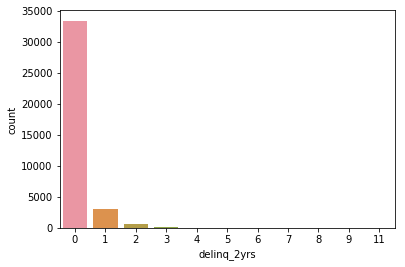

In [152]:
sns.countplot(loan.delinq_2yrs)

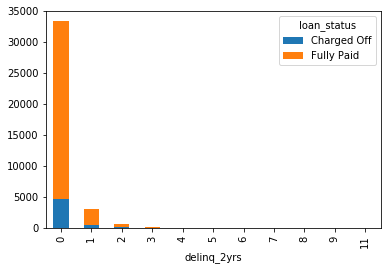

In [153]:
# sns.barplot(y='delinq_2yrs',x='loan_status',data=loan)
# plt.show()
delin=loan.groupby(['delinq_2yrs','loan_status'])['delinq_2yrs'].agg({'Frequency':'count'})
delin.Frequency.unstack().plot.bar(stacked=True)
plt.show()